## SNU PPSML - Machine Learning Exercise 4 (Note11)

#### **Contents**
---
* ML exercise 1: Gradient Descent [Optimization @ ML] (HW05)  

---
* ML exercise 2: Neural Network [Representation @ ML] (실습과제 11/5-8 & 11/9 강의)
    - 입력 속성데이터와 지도라벨값 $\{(x_i, y_i)\}$ @ 인코딩: 입력과 출력층의 설정  

    - 순전파 신경망(def feedforward())의 구성을 위한 여러가지 파라메터들     
        - $N_{layers}$ & $N_{nodes}$ in each layer
        - 가중치와 편향치 ($W$ & $B$)
        - 가중합(퍼셉트론 입력) : 
        
        > $a_j=W_{ji} f_i(a_i)$ (전층의 출력 $f_i$에 대한 가중합)
        
        - 활성화 함수(출력) : $f_j(a_j)$
        
        > $f(a)=\frac{1}{1+\exp^{-a}}$ for sigmoid  
        
        > $f(a)=\tanh(a)$ for tanh  
        
        > $f(a_k)=\frac{\exp[a_k]}{\sum_{k'}\exp[a_{k'}]}$ for softmax  
        
        > $f(a)=a$ for $ a > 0$ otherwise $0$ (ReLU)
        
        - 데이터의 순전파를 통한 최종 출력값 얻기: def feedforward(input_features)
        - ...
        
    - 오차보정의 역전파:  
    
        - 지도라벨값의 인코딩과 오차함수($E(w;x)$)의 정의
        - $\delta_j$ (가중합 $a_j$에 대한 오차보정항 $\equiv\frac{\partial E}{\partial a_j}$)
        - $\delta_j$를 통한 가중치보정 역전파의 구현: def backpropagate(target_label)
        - ...
        
    - 많은 데이터에 대한 학습 알고리즘 구현
    - check a contour of MLP's probability output for classification of 2D data  
    

---   
* ML exercise 3: Training a NN for Regression & Classification [Evaluation, Rep, Opt @ ML] (HW06-07, note09-10)
    - batch GD, mini-batch GD, stochastic GD [HW07]  
        - Visualize the minimizers in 2D
    - Validation of model, Over-fitting, Bias & Variance**  
        - Visualize an over-fitted status [note09]
    - Evaluation of model performance
        - error(loss), accuracy (...) --> learning curve [HW06]
        - NN score & ROC(Receiver Operating Characteristic) curve [note09, HW06]
    - Training a NN for Regression [note10]
    
    

---   
* **ML exercise 4: Your NNfactory VS Famous Deep Learning Platforms ** (note11,12)

    - easy-to-use Deep Learning API with easy-to-implement Neural Network frame 
        - Keras with Tensorflow-backend (or Tensorflow with Keras API)  
            [\[github\]](https://github.com/keras-team/keras)  
            [\[doc\]](https://keras.io/)
        - Tensorflow  
            [\[main\]](https://www.tensorflow.org/)  
            [\[github\]](https://github.com/tensorflow/tensorflow)  
        - PyTorch  
            [\[main\]](https://pytorch.org/) 
      
    - Data Manipulation and Analysis Tool
        - pandas DataFrame
            [\[doc\]](https://pandas.pydata.org/)  
              
    - **Regression using Keras (on Tensorflow-backend) VS NNfactory [note11] ** 
    
    - Classification using Keras VS NNfactory [note12]


In [0]:
# Printing all outputs in a cell (not only the last output)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Let's start the ML exercise 4 !

----------------
### **4.1 Installation of TensorFlow and Keras**

In [0]:
# TensorFlow
#sudo python3 -m pip install tensorflow  # <= for using cpu

# Keras 
#sudo python3 -m pip install keras

# Pandas
#sudo python3 -m pip install pandas

---
### **4.2 Regression using Keras(on TensorFlow-backend) VS NNfactory** 

   - Keras를 활용하여 note10에서 구현한 회귀 신경망을 재구현해보고, 학습곡선을 그려보자.
   - 각자 구현한 신경망 클래스를 활용한 회귀 신경망의 결과와 비교해보자.
   

In [0]:
# ===================
# Data (X) generation
# ===================

# X_train = np.linspace(-1,1,1001)
X_train = np.random.uniform(-1,1,1000)
X_test = np.random.uniform(-1,1,1000)

# =========================
# Label (=Y(X)) generation
# =========================
a, b = 1., 0.
Y_train = a*np.sin(2*np.pi*X_train) + b*np.random.randn(len(X_train))
Y_test = a*np.sin(2*np.pi*X_test) + b*np.random.randn(len(X_test))


# reshape of X & Y for making main data block
X_train=X_train.reshape((len(X_train),1))
X_test=X_test.reshape((len(X_test),1))

Y_train=Y_train.reshape((len(X_train),1))
Y_test=Y_test.reshape(len(X_test),1)

# stacking two columns - Y and X, into data_train/test array 
data_train = np.c_[Y_train,X_train]
data_test = np.c_[Y_test,X_test]

# train data check [y(x_i), x_i] 
data_train[:10]
# test data check 
# data_test[:10]

# # data save
# np.save('data_reg_overfit_train.npy',data_train)
# np.save('data_reg_overfit_test.npy',data_test)

# # data load from file
# data_train = np.load('data_reg_overfit_train.npy')
# data_test= np.load('data_reg_overfit_test.npy')

array([[ 0.58311608, -0.90091664],
       [-0.59279505,  0.89901221],
       [ 0.93314614,  0.3085259 ],
       [-0.95042236,  0.80032559],
       [-0.40650237, -0.43337415],
       [ 0.13984477,  0.47766982],
       [ 0.74012726,  0.36738262],
       [-0.30951549, -0.44991657],
       [-0.466364  , -0.07721815],
       [-0.9836364 ,  0.72116841]])

In [0]:
# plot the data 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

fig1 = plt.figure(figsize=(8,4))
ax1 = fig1.add_subplot(111)

ax1.plot(data_train[:,1],data_train[:,0], 'r.')
ax1.plot(data_test[:,1],data_test[:,0], 'b.')
ax1.set_xlabel('x', fontsize=20)
ax1.set_ylabel('$y(x)$', fontsize=20)
ax1.set_ylim(-2,2)
ax1.grid(True)

plt.show()

In [0]:
# ==================================
# Keras를 활용한 신경망 모형의 정의 및 학습
# ==================================

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras import optimizers
from keras import losses

# MLP/Fully-connected Feed-forward Neural Network(완전연결앞먹임) 신경망 모형의 인스턴스 선언
model = Sequential() 

# 신경망 모형 인스턴스에 n_node개의 노드를 가진 은닉층을 하나씩 추가 
n_node_input=1
n_node_hidden=100
n_node_output=1
act_func='relu'

## 첫번째 은닉층 (input_dim=입력층 노드수)
model.add(Dense(n_node_hidden, input_dim=n_node_input, activation=act_func))
## 두번째 은닉층
model.add(Dense(n_node_hidden, activation='relu'))
## 출력층
model.add(Dense(n_node_output))

## 에러함수 정의
myloss = 'mse' # losses.MSE  #'mse' # Mean squared error type
## 가중치 최적화 알고리즘과 함께 (GD 기반의 알고리즘에서) 사용될 (초기) 학습률을 정의
learning_rate=0.001
myoptimizer = optimizers.sgd(lr=learning_rate) # .Adam(lr=learning_rate) # .sgd(lr=learning_rate) (stochastic GD)

## 정의한 신경망 모형의 확인
model.summary()

## 학습 알고리즘의 정의
model.compile(optimizer=myoptimizer, loss=myloss)

# * 실제 가중치의 학습 
# =================
# 1) data_train의 속성값-data_train[:,1]과 라벨-data_train[:,0]을 훈련데이터로 활용
# 2) data_test의 속성값과 라벨을 validation data로 사용
# 3) batch_size: 가중치 업데이트마다 사용할 샘플 데이터의 수
# 4) epochs: 총 학습주기수
# 5) verbose: 학습과정출력모드 설정 
hist = model.fit(data_train[:100,1],data_train[:100,0], epochs=1000, batch_size=1, validation_data=(data_test[:100,1],data_test[:100,0]), verbose=1)

# * Signature: model.fit(x, y, batch_size=32, epochs=10, verbose=1, callbacks=None, validation_split=0.0, validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, **kwargs)
# * Docstring:
# * Trains the model for a fixed number of epochs.

# * Arguments
#     x: input data, as a Numpy array or list of Numpy arrays
#         (if the model has multiple inputs).
#     y: labels, as a Numpy array.
#     batch_size: integer. Number of samples per gradient update.
#     epochs: integer, the number of epochs to train the model.
#     verbose: 0 for no logging to stdout,
#         1 for progress bar logging, 2 for one log line per epoch.
#     callbacks: list of `keras.callbacks.Callback` instances.
#         List of callbacks to apply during training.
#         See [callbacks](/callbacks).
#     validation_split: float (0. < x < 1).
#         Fraction of the data to use as held-out validation data.
#     validation_data: tuple (x_val, y_val) or tuple
#         (x_val, y_val, val_sample_weights) to be used as held-out
#         validation data. Will override validation_split.
#     shuffle: boolean or str (for 'batch').
#         Whether to shuffle the samples at each epoch.
#         'batch' is a special option for dealing with the
#         limitations of HDF5 data; it shuffles in batch-sized chunks.
#     class_weight: dictionary mapping classes to a weight value,
#         used for scaling the loss function (during training only).
#     sample_weight: Numpy array of weights for
#         the training samples, used for scaling the loss function
#         (during training only). You can either pass a flat (1D)
#         Numpy array with the same length as the input samples
#         (1:1 mapping between weights and samples),
#         or in the case of temporal data,
#         you can pass a 2D array with shape (samples, sequence_length),
#         to apply a different weight to every timestep of every sample.
#         In this case you should make sure to specify
#         sample_weight_mode="temporal" in compile().
#     initial_epoch: epoch at which to start training
#         (useful for resuming a previous training run)

# # Returns
#     A `History` object. Its `History.history` attribute is
#     a record of training loss values and metrics values
#     at successive epochs, as well as validation loss values
#     and validation metrics values (if applicable).

TypeError: mean_squared_error() missing 2 required positional arguments: 'y_true' and 'y_pred'

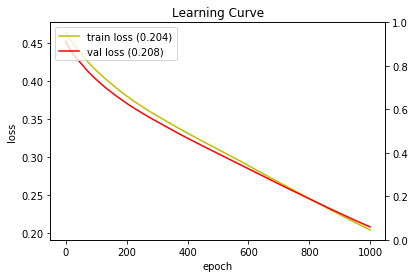

In [0]:
#=====================
# Learning Curve Plot
#=====================
# %matplotlib inline
import matplotlib
# matplotlib.use('Agg') 
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
# accuracy가 평가의 지표로 사용할 경우를 위하여, 오른쪽의 y-axis를 예약 (이곳 회귀에서는 loss만을 체크)
acc_ax = loss_ax.twinx()

# 위 model.fit의 return을 담고 있는 hist객체는, 학습과정의 history를 가지고 있다.
loss_ax.plot(hist.history['loss'], 'y', label='train loss (%5.3f)'%(hist.history['loss'][-1]))                        
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss (%5.3f)'%(hist.history['val_loss'][-1]))                                                                                                            

loss_ax.set_title("Learning Curve")
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')

# accuracy가 평가의 지표로 사용할 경우를 위하여. (회귀에서는 loss만을 체크)
# acc_ax.plot(hist.history['acc'], 'b', label='train acc (%5.3f)'%(hist.history['acc'][-1]))                    
# acc_ax.plot(hist.history['val_acc'], 'g', label='val acc (%5.3f)'%(hist.history['val_acc'][-1]))                                                                                    
# acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
# acc_ax.legend(loc='lower left')
# acc_ax.grid(True)

fig.savefig('./LC.png', dpi=fig.dpi, bbox_inches='tight')
                                                                                                                      

---
* Keras에서 학습한 회귀 모형을 시각화해보기

----
### Cross check using NNfactory

In [0]:
%reload_ext autoreload
%autoreload 2

import NNfactory

In [0]:
model_str = '1:identity|'+2*'100:relu|'+'1:identity'
lr = 0.001
name_tag = 'regression_lr'+str(lr)

In [0]:
mynn = NNfactory.MLP(model_structure=model_str, \
                     model_nametag=name_tag, \
                     learning_rate=lr, \
                     encoding='float')


 * 다음과 같은 구조의 다층퍼셉트론 연결이 초기화 되었습니다 *

 > 모델이름 = regression_lr0.001
 > 총 층수 (입력 + 은닉(s) + 출력) =  3
 > 각 층에서의 노드수 =  [1, 100, 1]
 > 각 층에서의 활성화 함수 =  ['identity', 'relu', 'identity']
 > 학습률(Learning Rate) =  0.001
 > 지도라벨 인코딩 방식 =  float


In [0]:
# 훈련 준비
data_type=None #mnist' # None
encoding='float' #'one-hot' #'integer' # 'float'

# 훈련 & 테스트 데이터 준비
n_data_max=100  # 훈련에 사용할 데이터 갯수 
n_data_test=100  # 테스트에 사용할 테이터 갯수

## 훈련 데이터
training_data_list = data_train[:n_data_max]

## 테스트 데이터
test_data_list = data_test[:n_data_test]

# 최대학습주기 설정
epochs = 1000

In [0]:
# 설정된 최대학습주기동안 훈련

for e in range(epochs):
    
    id_data = 0
    
    for data in training_data_list:
        
        # 프로세스 게이지
        id_data += 1
        
        # 입력/지도 데이터 가공 
        if data_type == 'mnist':
            # split the mnist data by the ',' commas
            all_list = data.split(',')
            # 입력 속성 데이터 스케일링 (preprocessing)
            input_list = np.asfarray(all_list[1:])/255.0 #* 0.99) + 0.01
            # 지도 라벨 벡터 가공 (shape = (10,))
            target_list = np.zeros(10) #mynn.n_nodes[-1])
            # all_values[0] is the target label for this data
            target_list[int(all_list[0])] = 1.0
            
        else:
        
            input_list = data[1:] #np.asfarray(all_values[1:])        
            target_origin = data[0]
            
            if encoding == 'one-hot':

                target_list = np.zeros(mynn.n_nodes[-1])
                target_list[int(data[0])] = 1
    
            elif encoding == 'integer':
                
                target_list = np.zeros(1)
                target_list[0] = int(data[0])

            elif encoding == 'float':
                
                target_list = np.zeros(1)
                target_list[0] = data[0]
                
            else:
                raise ValueError(' => check your encoding scheme. ')
                
        mynn.train(input_list, target_list)
        
        pass

    if (e%100==0):
        print (' --------------------------------------')
        print(' * epoch = {}'.format(e+1))
        print(' > 훈련 샘플에 대한 성능 (정확도 & 평균에러) ')
        mynn.check_accuracy_error(training_data_list, 0, n_data_max-1, data_type=None)
        print('')
        print(' > 테스트 샘플에 대한 성능 (정확도 & 평균에러) ')
        mynn.check_accuracy_error(test_data_list, 0, n_data_test-1, data_type=None)
    
    
    pass

 --------------------------------------
 * epoch = 1
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 평균에러 =  0.0444455879263

 > 테스트 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 평균에러 =  0.0536081545429
 --------------------------------------
 * epoch = 101
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 평균에러 =  0.0391869662602

 > 테스트 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 평균에러 =  0.0475219446045
 --------------------------------------
 * epoch = 201
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 평균에러 =  0.0345899878075

 > 테스트 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 평균에러 =  0.0421193194259
 --------------------------------------
 * epoch = 301
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 평균에러 =  0.0305791066888

 > 테스트 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 평균에러 =  0.0374447622207
 --------------------------------------
 * epoch = 401
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 평균에러 =  0.027066032486

 > 테스트 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 평균에러 =  0.0334062964614
 --------------------------------------
 * epoch = 501
 > 훈련 샘플에 대한 성능 (정확도 & 평균에러) 
 
 * 현재 평균에러 

---
* 훈련한 모형의 저장

훈련된 모형은 NNfactory클래스 안의 save_model메소드를 사용하여 .npy포맷의 numpy array로 저장할 수 있다.

In [0]:
mynn.save_model(fname='mlp_reg_with_keras.npy', nametag='reg_overfit')


---
* 저장된 모형 불러오기 :

저장된 .npy파일로부터 신경망정보가 담긴 넘파이 배열을 직접 로드하고, 이 넘파이 배열을 새 신경망 인스턴스 생성에 사용하여 저장된 모형과 똑같은 신경망을 로드한다.

In [0]:
mynn_npy = np.load('mlp_reg_with_keras.npy')
mynn_load = NNfactory.MLP(load_model_np=mynn_npy)


 * 다음과 같은 구조의 다층퍼셉트론 모형이 "load_model_np" 정보로부터 로드되었습니다. *

 > 모델이름 = reg_overfit
 > 총 층수 (입력 + 은닉(s) + 출력) =  3
 > 각 층에서의 노드수 =  [1, 100, 1]
 > 각 층에서의 활성화 함수 =  ['identity', 'relu', 'identity']
 > 학습률(Learning Rate) =  0.001
 > 지도라벨 인코딩 방식 =  float


-----
*  NNfactory 회귀 모형을 시각화해보기

In [0]:
# sample data (X_val) generation
X_val = np.linspace(-1,1,1000)
X_val = X_val.reshape((len(X_val),1))

# X_val 데이터에 대한 회귀모형 출력값 얻기
result=[]
for X in X_val:
    result.append(mynn_load.feedforward(X)[0])   

In [0]:
data_train

array([[ 0.58311608, -0.90091664],
       [-0.59279505,  0.89901221],
       [ 0.93314614,  0.3085259 ],
       ..., 
       [ 0.09302096,  0.01482618],
       [ 0.78381001, -0.6433632 ],
       [ 0.49223561,  0.08191008]])